In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040246.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2         3         4         5         6  \
0  0.572549  0.556863  0.545098  0.529412  0.513725  0.501961  0.486275   

         7         8         9  ...      4192      4193      4194      4195  \
0  0.47451  0.462745  0.447059  ...  0.352941  0.352941  0.352941  0.352941   

       4196      4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  0.352941  0.352941  0.352941  0.356863    111.628099      54.322314  

[1 rows x 4202 columns]
[111.62809917]  /  [54.32231405]
          0         1         2         3         4         5         6  \
0  0.572549  0.556863  0.545098  0.529412  0.513725  0.501961  0.486275   

         7         8         9  ...      4190      4191      4192      4193  \
0  0.47451  0.462745  0.447059  ...  0.360784  0.356863  0.352941  0.352941   

       4194      4195      4196      4197      4198      4199  
0  0.352941  0.352941  0.352941  0.352941  0.352941  0.356863  

[1 rows x 4200 columns]


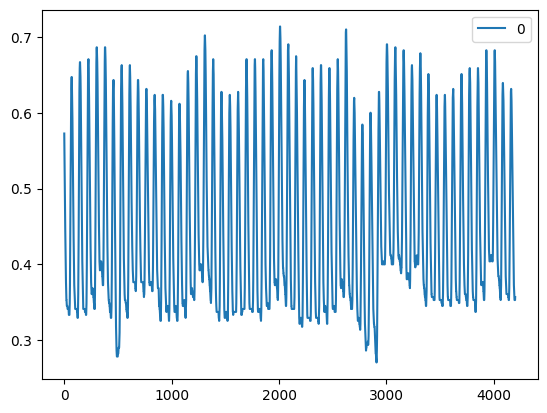

In [234]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [235]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

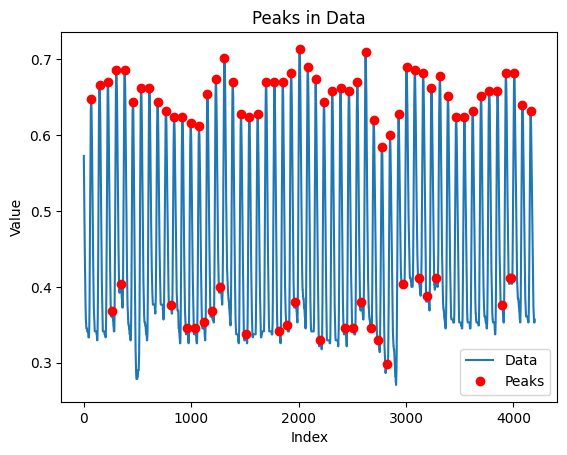

{'indices': array([  68,  146,  224,  263,  302,  342,  380,  458,  534,  611,  687,
        764,  808,  841,  917,  961,  995, 1037, 1073, 1118, 1151, 1189,
       1230, 1270, 1309, 1387, 1464, 1510, 1541, 1619, 1697, 1775, 1818,
       1852, 1891, 1931, 1969, 2009, 2086, 2159, 2202, 2236, 2313, 2391,
       2429, 2469, 2511, 2547, 2584, 2624, 2673, 2699, 2740, 2775, 2827,
       2852, 2931, 2969, 3005, 3083, 3118, 3160, 3200, 3237, 3282, 3316,
       3391, 3467, 3544, 3621, 3699, 3775, 3852, 3892, 3930, 3971, 3979,
       4008, 4084, 4161]), 'values': array([0.64705882, 0.66666667, 0.67058824, 0.36862745, 0.68627451,
       0.40392157, 0.68627451, 0.64313725, 0.6627451 , 0.6627451 ,
       0.64313725, 0.63137255, 0.37647059, 0.62352941, 0.62352941,
       0.34509804, 0.61568627, 0.34509804, 0.61176471, 0.35294118,
       0.65490196, 0.36862745, 0.6745098 , 0.4       , 0.70196078,
       0.67058824, 0.62745098, 0.3372549 , 0.62352941, 0.62745098,
       0.67058824, 0.67058824, 0.34117

In [236]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [239]:
def split_values_high_low(filtered_df, threshold=0.5):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(peak_values_df)
print(high_values)
print(low_values)


[0.6470588235294118, 0.6666666666666666, 0.6705882352941176, None, 0.6862745098039216, None, 0.6862745098039216, 0.6431372549019608, 0.6627450980392157, 0.6627450980392157, 0.6431372549019608, 0.6313725490196078, None, 0.6235294117647059, 0.6235294117647059, None, 0.615686274509804, None, 0.611764705882353, None, 0.6549019607843137, None, 0.6745098039215687, None, 0.7019607843137254, 0.6705882352941176, 0.6274509803921569, None, 0.6235294117647059, 0.6274509803921569, 0.6705882352941176, 0.6705882352941176, None, 0.6705882352941176, None, 0.6823529411764706, None, 0.7137254901960784, 0.6901960784313725, 0.6745098039215687, None, 0.6431372549019608, 0.6588235294117647, 0.6627450980392157, None, 0.6588235294117647, None, 0.6705882352941176, None, 0.7098039215686275, None, 0.6196078431372549, None, 0.5843137254901961, None, 0.6, 0.6274509803921569, None, 0.6901960784313725, 0.6862745098039216, None, 0.6823529411764706, None, 0.6627450980392157, None, 0.6784313725490196, 0.6509803921568628

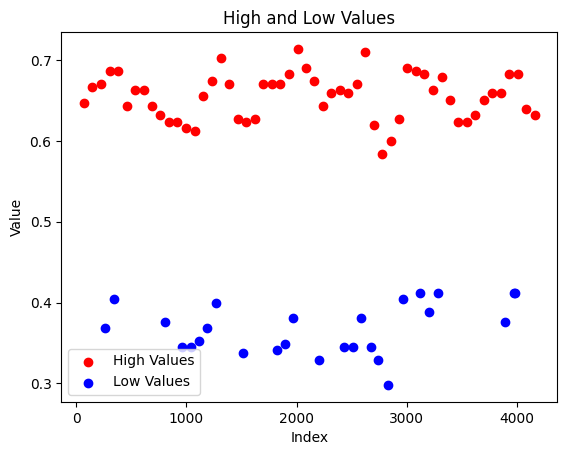

In [240]:
# Plot high values
plt.scatter(peak_values_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(peak_values_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [241]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 0.6554829339143063
Average Low Value: 0.3675716440422322
